# DS4200 Project Visualizations

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import numpy as np

In [4]:
celtics_df = pd.read_csv('celtics_2024_shots.csv')

print(celtics_df.info())

celtics_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7396 entries, 0 to 7395
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEASON_1        7396 non-null   int64  
 1   SEASON_2        7396 non-null   object 
 2   TEAM_ID         7396 non-null   int64  
 3   TEAM_NAME       7396 non-null   object 
 4   PLAYER_ID       7396 non-null   int64  
 5   PLAYER_NAME     7396 non-null   object 
 6   POSITION_GROUP  7330 non-null   object 
 7   POSITION        7330 non-null   object 
 8   GAME_DATE       7396 non-null   object 
 9   GAME_ID         7396 non-null   int64  
 10  HOME_TEAM       7396 non-null   object 
 11  AWAY_TEAM       7396 non-null   object 
 12  EVENT_TYPE      7396 non-null   object 
 13  SHOT_MADE       7396 non-null   bool   
 14  ACTION_TYPE     7396 non-null   object 
 15  SHOT_TYPE       7396 non-null   object 
 16  BASIC_ZONE      7396 non-null   object 
 17  ZONE_NAME       7396 non-null   o

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2024,2023-24,1610612738,Boston Celtics,201950,Jrue Holiday,G,PG,11-10-2023,22300010,...,In The Paint (Non-RA),Center,C,Less Than 8 ft.,-1.6,12.35,7,1,11,39
1,2024,2023-24,1610612738,Boston Celtics,1627759,Jaylen Brown,F,SF,11-10-2023,22300010,...,Restricted Area,Center,C,Less Than 8 ft.,-1.2,8.75,3,1,11,13
2,2024,2023-24,1610612738,Boston Celtics,1628369,Jayson Tatum,F,PF,11-10-2023,22300010,...,Above the Break 3,Right Side Center,RC,24+ ft.,-13.5,30.05,28,1,10,27
3,2024,2023-24,1610612738,Boston Celtics,1627759,Jaylen Brown,F,SF,11-10-2023,22300010,...,Mid-Range,Left Side Center,LC,16-24 ft.,13.4,17.45,18,1,10,22
4,2024,2023-24,1610612738,Boston Celtics,1627759,Jaylen Brown,F,SF,11-10-2023,22300010,...,Above the Break 3,Left Side Center,LC,24+ ft.,14.7,27.95,27,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7391,2024,2023-24,1610612738,Boston Celtics,201143,Al Horford,C,C,12-08-2023,22301227,...,Above the Break 3,Right Side Center,RC,24+ ft.,-22.3,19.55,26,4,2,59
7392,2024,2023-24,1610612738,Boston Celtics,1628369,Jayson Tatum,F,PF,12-08-2023,22301227,...,Above the Break 3,Right Side Center,RC,24+ ft.,-10.9,30.85,27,4,2,20
7393,2024,2023-24,1610612738,Boston Celtics,201950,Jrue Holiday,G,PG,12-08-2023,22301227,...,Mid-Range,Center,C,16-24 ft.,-0.1,23.25,18,4,1,46
7394,2024,2023-24,1610612738,Boston Celtics,1628401,Derrick White,G,SG,12-08-2023,22301227,...,Restricted Area,Center,C,Less Than 8 ft.,1.4,6.45,1,4,1,10


# Static Plots

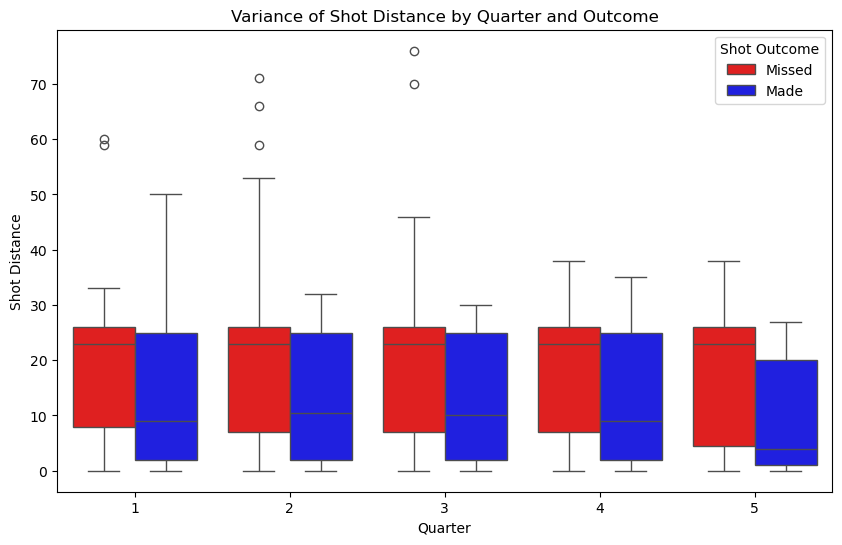

In [48]:
# Update the 'SHOT_MADE' column values and set custom colors for the boxplot
celtics_df['SHOT_MADE'] = celtics_df['SHOT_MADE'].replace({True: 'Made', False: 'Missed'})

# Create a boxplot with updated labels and custom colors
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=celtics_df,
    x='QUARTER',
    y='SHOT_DISTANCE',
    hue='SHOT_MADE',
    palette={'Made': 'blue', 'Missed': 'red'}
)

# Add labels and title
plt.title('Variance of Shot Distance by Quarter and Outcome')
plt.xlabel('Quarter')
plt.ylabel('Shot Distance')
plt.legend(title='Shot Outcome')

plt.savefig('plot4.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/gv/7xkdbm4x3ls0wpllhxc8p83c0000gn/T/ipykernel_84148/288356145.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shot_type_outcome = celtics_df.groupby(['SHOT_TYPE', 'SHOT_MADE']).size().unstack(fill_value=0)


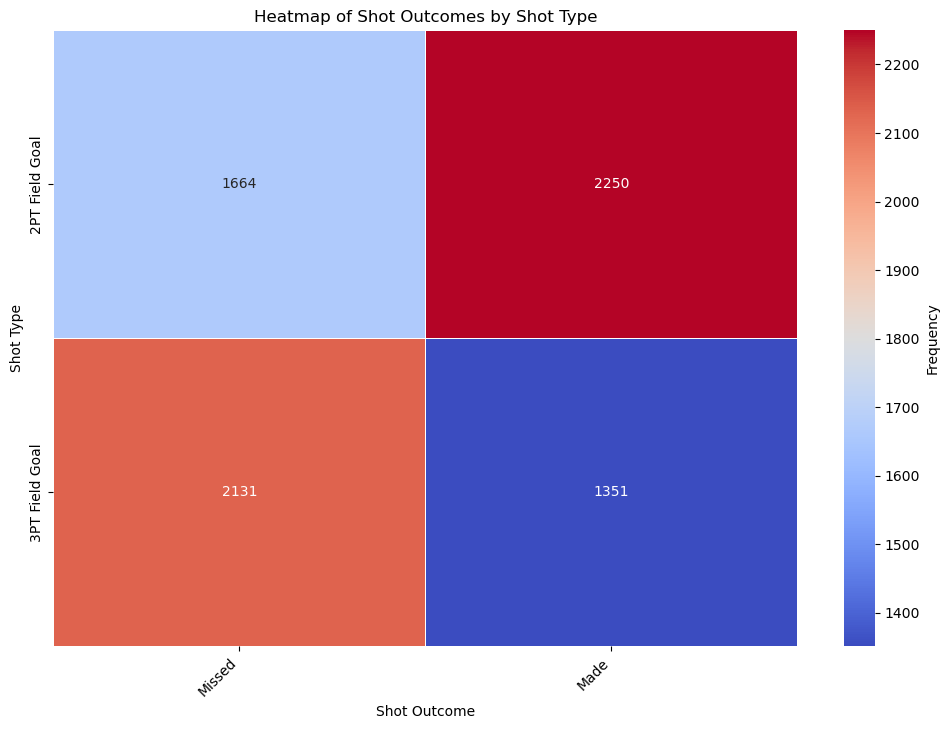

In [56]:
# Create a heatmap to show the frequency of shot types and outcomes
# Count the occurrences of each combination of SHOT_TYPE and SHOT_MADE
shot_type_outcome = celtics_df.groupby(['SHOT_TYPE', 'SHOT_MADE']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    shot_type_outcome,
    annot=True,
    fmt='d',
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Frequency'},
)

# Add labels and title
plt.title('Heatmap of Shot Outcomes by Shot Type')
plt.xlabel('Shot Outcome')
plt.ylabel('Shot Type')
plt.xticks(rotation=45, ha='right')

plt.savefig('plot5.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()


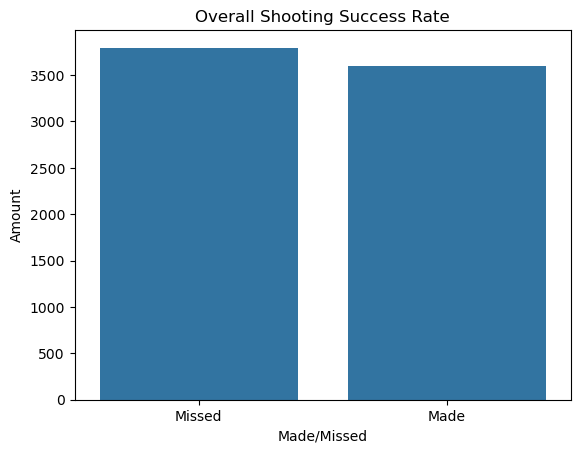

In [12]:
sns.countplot(data=celtics_df, x='SHOT_MADE')

plt.title('Overall Shooting Success Rate')
plt.xlabel('Made/Missed')
plt.ylabel('Amount')
plt.show()

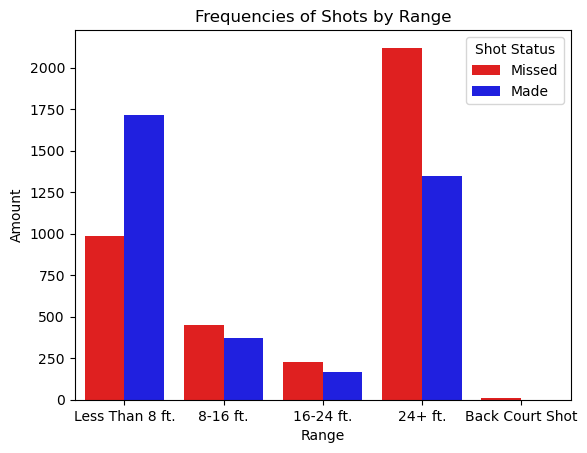

In [50]:
celtics_df['ZONE_RANGE'] = celtics_df['ZONE_RANGE'].astype(pd.CategoricalDtype(categories=['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.', 'Back Court Shot']))

sns.countplot(data=celtics_df, x='ZONE_RANGE', hue='SHOT_MADE', palette=['red', 'blue'])
plt.title('Frequencies of Shots by Range')
plt.xlabel('Range')
plt.ylabel('Amount')
plt.legend(['Missed', 'Made'], title='Shot Status')
plt.savefig('plot.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

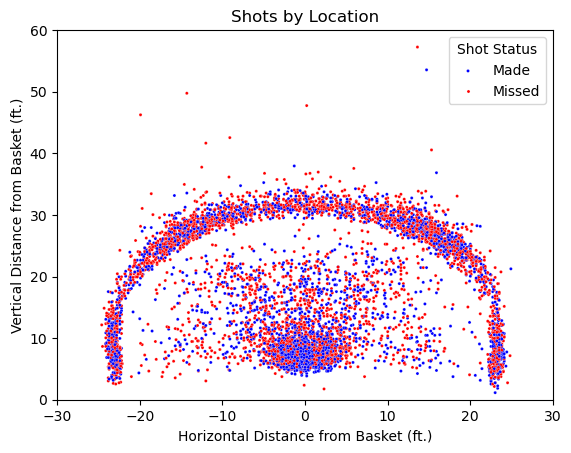

In [52]:
sns.scatterplot(data=celtics_df, x='LOC_X', y='LOC_Y', hue='SHOT_MADE', palette=['red', 'blue'], s=5)

plt.title('Shots by Location')
plt.xlim(-30, 30)
plt.xlabel('Horizontal Distance from Basket (ft.)')
plt.ylim([0, 60])
plt.ylabel('Vertical Distance from Basket (ft.)')
plt.legend(['Made', 'Missed'], title='Shot Status')
plt.savefig('plot2.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

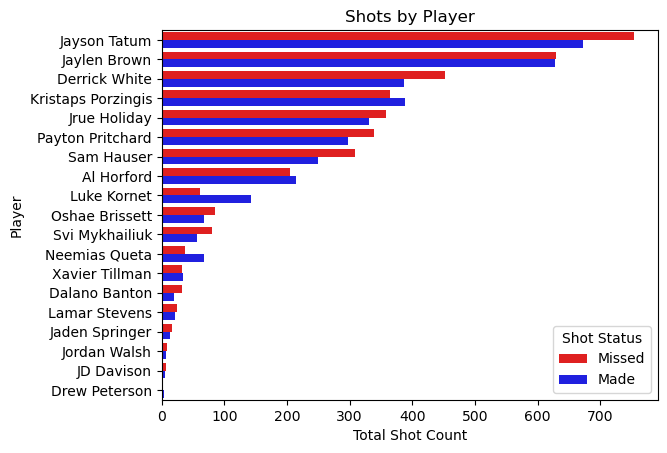

In [58]:
most_shots_list = celtics_df['PLAYER_NAME'].value_counts()

sns.countplot(data=celtics_df, y='PLAYER_NAME', hue='SHOT_MADE', palette=['red', 'blue'], order=most_shots_list.index)
plt.title('Shots by Player')
plt.xlabel('Total Shot Count')
plt.ylabel('Player')
plt.yticks(most_shots_list.index.values)
plt.legend(['Missed', 'Made'], title='Shot Status')
plt.savefig('plot3.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()

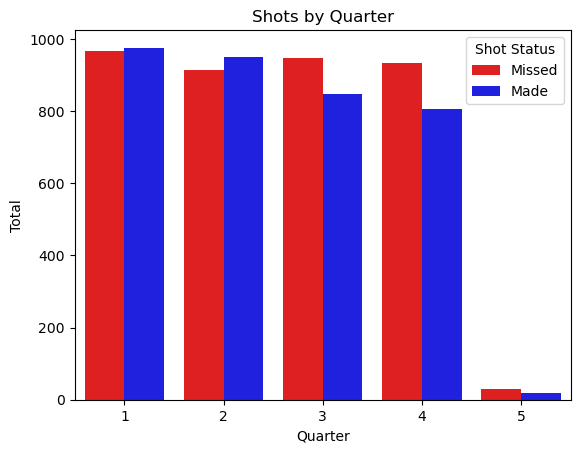

In [20]:
sns.countplot(data=celtics_df, x='QUARTER', hue='SHOT_MADE', palette=['red', 'blue'],)

plt.title('Shots by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total')
plt.legend(['Missed', 'Made'], title='Shot Status')
plt.show()

In [23]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

# Interactive Plot 1 - Shot Chart

In [32]:
# Filter data to 10 players with most shots
players_most_shots = celtics_df['PLAYER_NAME'].value_counts().head(10)
most_shots_df = celtics_df[celtics_df['PLAYER_NAME'].isin(players_most_shots.index)]

# Add total time left column
# Normal 4 quarter time left
non_overtime = celtics_df[celtics_df['QUARTER'] < 5]
non_overtime.loc[:, 'TOTAL_TIME_LEFT'] = (4 - non_overtime['QUARTER'])*720 + non_overtime['MINS_LEFT']*60 + non_overtime['SECS_LEFT']
# Overtime quarter time left
overtime = celtics_df[celtics_df['QUARTER'] > 4]
overtime.loc[:, 'TOTAL_TIME_LEFT'] = overtime['MINS_LEFT']*60 + overtime['SECS_LEFT']
# Combine overtime, non-overtime
celtics_df = pd.concat([non_overtime, overtime])
# Total time left as readable tooltip
celtics_df['TOTAL_TIME_LEFT_TOOLTIP'] = 'Q' + celtics_df['QUARTER'].astype(str) + ', ' + celtics_df['MINS_LEFT'].astype(str) + ' min, ' + celtics_df['SECS_LEFT'].astype(str) + ' sec'
celtics_df


TypeError: Unordered Categoricals can only compare equality or not

In [ ]:
# Player selection
player_dropdown = alt.binding_select(options=np.append(None, most_shots_df['PLAYER_NAME'].unique()), name='Player Name ', labels=np.append('All Players', most_shots_df['PLAYER_NAME']))
player_selection = alt.selection_point(fields=['PLAYER_NAME'], bind=player_dropdown)

# Color for shot made/missed
made_missed_condition = alt.condition(alt.datum.SHOT_MADE, alt.value('blue'), alt.value('red'))

# Shot made/missed radio selection
made_missed_radio = alt.binding_radio(options=[True, False, None], labels=['Made', 'Missed', 'Both'], name='Shot Made')
made_missed_selection = alt.selection_point(fields=['SHOT_MADE'], bind=made_missed_radio)

# Radio button for quarter
quarter_radio = alt.binding_radio(name='Quarter: ', options=np.append(celtics_df['QUARTER'].unique(), None), labels=['First', 'Second', 'Third', 'Fourth', 'Overtime', 'All'])
quarter_selection = alt.selection_point(fields=['QUARTER'], bind=quarter_radio)
# Condition for quarter
quarter_condition = alt.condition(quarter_selection, alt.value(.5), alt.value(0))

# Interactive scatterplot of shot locations
shot_chart = alt.Chart(celtics_df).mark_circle().encode(
    alt.X('LOC_X:Q', title='Horizontal Distance from Basket (ft.)').scale(domain=(-25,25)),
    alt.Y('LOC_Y:Q', title='Vertical Distance from Basket (ft.)').scale(domain=(0,90)),
    color=made_missed_condition,
    opacity=quarter_condition,
    tooltip=[alt.Tooltip('PLAYER_NAME', title='Player'), alt.Tooltip('TOTAL_TIME_LEFT_TOOLTIP', title='Time Left')]
).add_params(
    player_selection,
    made_missed_selection,
    quarter_selection
).transform_filter(
    player_selection,
    made_missed_selection,
    quarter_selection
).interactive()

chart1 = shot_chart.properties(title='Shot Chart of 10 Players with Most Shots')
# Save as html file
# chart1.save('shot_chart.html')

chart1

# Interactive Plot 2 - Total Points by Shot Type

In [36]:
# Convert column type to date
celtics_df['GAME_DATE'] = celtics_df['GAME_DATE'].astype('datetime64[s]')
# Add a points multiplier column for plotting points/game
celtics_df['POINTS'] = np.where(celtics_df['SHOT_TYPE'] == '2PT Field Goal', 2, 3)

# Date slider
date_selection = alt.selection_interval(encodings=['x'])

# Base chart
shot_type_chart = alt.Chart(celtics_df[celtics_df['SHOT_MADE']]).mark_line(point=True).encode(
    alt.X('GAME_DATE:T', title='Date'),
    alt.Y('sum(POINTS):Q', title='Total Points'),
    tooltip=[alt.Tooltip('GAME_DATE:T', format='%m-%d-%Y', title='Date'), 'SHOT_TYPE:N', alt.Tooltip('sum(POINTS):Q', title='Total Points'), alt.Tooltip('HOME_TEAM:N', title='Home Team'), alt.Tooltip('AWAY_TEAM:N', title='Away Team')],
    color='SHOT_TYPE:N'
).interactive()
# Upper chart using lower chart as date slider
upper = shot_type_chart.encode(alt.X('GAME_DATE:T', title='Date').scale(domain=date_selection)).properties(title='Total Points Per Game by Shot Type')
lower = shot_type_chart.properties(height=60).add_params(date_selection)

chart2 = upper & lower
# Save as html file
# chart2.save('ppg_shot_type.html')

chart2

KeyError: "None of [CategoricalIndex(['Made', 'Missed', 'Missed', 'Made', 'Made', 'Made', 'Made',\n                  'Missed', 'Made', 'Made',\n                  ...\n                  'Missed', 'Missed', 'Missed', 'Made', 'Missed', 'Missed',\n                  'Missed', 'Made', 'Missed', 'Made'],\n                 categories=['Missed', 'Made'], ordered=False, dtype='category', length=7396)] are in the [columns]"